### Watch Video for Guide

https://www.youtube.com/watch?v=tFNJGim3FXw&t=3234s

## 1. Install & Import Dependencies

In [ ]:
!pip3 -q install torch torchvision

Note: Visit https://github.com/ultralytics/yolov5

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [1]:
cd yolov5/

/Users/george/Desktop/MachineLearning/Neural_Networks/PyTorch/YOLO_ObjectDetection/yolov5


In [2]:
!pip -q install -r requirements.txt

In [3]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
print(torch.__version__)

2.10.0


## 2. Load Model

Load pretrained model from torchhub

Hub : https://pytorch.org/hub/ultralytics_yolov5/

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/george/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2026-2-5 Python-3.13.11 torch-2.10.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## 3. Make Detections

In [7]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [8]:
results = model(img)
results.print()

/Users/george/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 720x1280 2 persons, 1 tie, 1 cell phone
Speed: 973.6ms pre-process, 55.9ms inference, 0.7ms NMS per image at shape (1, 3, 384, 640)


In [9]:
np.array(results.render()).shape

(1, 720, 1280, 3)

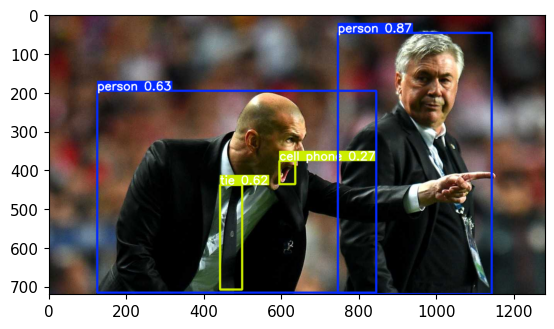

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()



In [11]:
img_cars="https://platform.vox.com/wp-content/uploads/sites/2/chorus/uploads/chorus_asset/file/2487876/141929352.0.jpg?quality=90&strip=all&crop=0,0,100,100"

In [12]:
results_for_car = model(img_cars)
results_for_car.print()

/Users/george/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1994x3000 5 persons, 32 cars, 2 trucks
Speed: 393.5ms pre-process, 54.4ms inference, 0.6ms NMS per image at shape (1, 3, 448, 640)


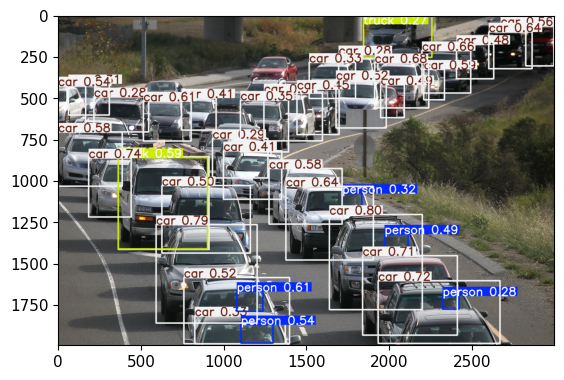

In [13]:
%matplotlib inline
plt.imshow(np.squeeze(results_for_car.render()))
plt.show()


## 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)

    cv2.imshow('YOLO',np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

In [14]:
# cap = cv2.VideoCapture("input_some_video.mp4")

# while cap.isOpened():
#     ret, frame = cap.read()

#     results = model(frame)

#     cv2.imshow('YOLO',np.squeeze(results.render()))

#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break


# cap.release()
# cv2.destroyAllWindows()

## 5. Train From Scratch

In [14]:
import uuid
import os
import time

In [17]:
ls

data/                          yolov5/
Drowsy_Detection_YOLOv5.ipynb


In [18]:
IMAGES_PATH = os.path.join('data','images') #data/images
labels = ['awake','drowsy']
number_imgs=20

In [19]:
ls

data/                          yolov5/
Drowsy_Detection_YOLOv5.ipynb


In [31]:
cap = cv2.VideoCapture(0)

for label in labels:
    print ('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print ('Collecting images for {}, image number {}'.format(label,img_num))

        # Webcam feed
        ret,frame = cap.read()


        #Naming out image path 
        imgname= os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')

        # Writes out image to file 
        cv2.imwrite(imgname,frame)

        # Render to the screen
        cv2.imshow('Image Collection',frame)
        
        # 2 second delay between each capture
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


cap.release()
cv2.destroyAllWindows()

        
    

In [20]:
# for label in labels:
#     print ('Collecting images for {}'.format(label))
#     for img_num in range(number_imgs):
#         print ('Collecting images for {}, image number {}'.format(label,img_num))
#         imgname= os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')
#         print(imgname)


LabelImg : https://github.com/HumanSignal/labelImg

In [23]:
pwd

'/Users/george/Desktop/MachineLearning/Neural_Networks/PyTorch/YOLO_ObjectDetection'

In [25]:
!git clone https://github.com/HumanSignal/labelImg.git

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Total 2097 (delta 0), reused 0 (delta 0), pack-reused 2097 (from 1)
Receiving objects: 100% (2097/2097), 237.15 MiB | 60.63 MiB/s, done.
Resolving deltas: 100% (1221/1221), done.


In [29]:
!pip3 install pyqt5 lxml --upgrade


In [30]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

**Note: Inside of data folder create another folder called 'labels'**

When launching labelImg from local terminal, make sure its in the same virtual environment as this file(since most libraries have been installed here)

Once in labelImg directory launch labelImg.py

`python labelImg.py`

After labelling images, goto yoloV5 folder & create a fresh file called dataset.yaml

Copy the format from this link for yaml file: https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#11-create-datasetyaml


In [33]:
# YAML Structure

# # Dataset root directory relative to the yolov5 directory
# path: ../data

# # Train/val/test sets: specify directories, *.txt files, or lists
# train: images 
# val: images


## Classes 
# nc: 17 # number of classes
# names: [ 'dog','person', 'cat', 'tv','car','meatballs','marinara sauce','tomato soup','chicken noodle soup','french onion soup','chicken breast','ribs','pulled pork','hamburger','cavity','awake','drowsy'] # class names

In [34]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-459-gdd2e2574 Python-3.13.11 torch-2.10.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, 

If you want to monitor the results checkout the yolov5 folder and head to 'runs' -> 'train' -> 'exp_{latest_run}' 

- Check for results.csv to view the accuracy

- Check for weights folder to load the trained model

## 6. Load Model

In [35]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import cv2

import uuid
import os
import time

In [36]:
pwd

'/Users/george/Desktop/MachineLearning/Neural_Networks/PyTorch/YOLO_ObjectDetection'

In [37]:
model = torch.hub.load('ultralytics/yolov5', 'custom',path='yolov5/runs/train/exp/weights/last.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/george/.cache/torch/hub/master.zip


YOLOv5 🚀 2026-2-5 Python-3.13.11 torch-2.10.0 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [38]:
img =os.path.join('data','images','drowsy.5c3cc6ae-0266-11f1-afca-5a35912294dd.jpg')

In [39]:
results = model(img)

/Users/george/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [40]:
results.print()

image 1/1: 1080x1920 1 drowsy
Speed: 32.6ms pre-process, 55.7ms inference, 5.0ms NMS per image at shape (1, 3, 384, 640)


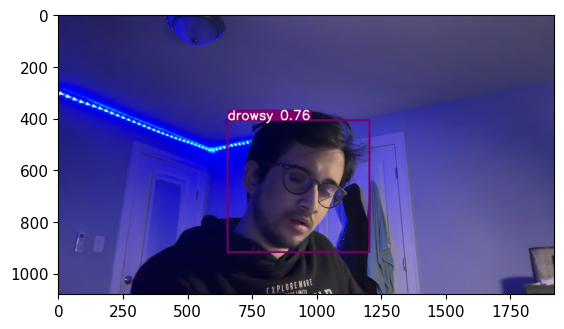

In [41]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [42]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)

    cv2.imshow('YOLO',np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

/Users/george/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/george/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/george/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/george/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:899: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/george/.cache/torch/hub/ultralytics_yolov5_master/models/comm